<a href="https://colab.research.google.com/github/AndrehAguiar/POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados/blob/master/projeto_2/classificador_projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

*Indique a base escolhida.*<br />
Forest covertypes - https://archive.ics.uci.edu/ml/datasets/Covertype

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [1]:
#@title Importações necessárias: pandas, seaborn, matplotlib, numpy e sklearn.
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import fetch_covtype
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
df = fetch_covtype()
print(df['DESCR'])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30Ã—30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be 

In [0]:
#@title Funções para tratamento de dados categóricos:<ul><li>Define os dados e classes.</li><li>Categoriza os Tipos de Cobertura.</li><li>Categoriza os Tipos de Área.</li><li>Categoriza os Tipos de Solo.</li><li>Define o número de componentes (PCA)</li><li>Define o número de k (KNN)</li></ul>
def getData():
  X = df['data']
  y = df['target']
  return (X, y)


def nomea_coverType(int):
  if int == 1:
    return 'abeto'
  elif int == 2:
    return 'pinheiro'
  elif int == 3:
    return 'Ponderosa'
  elif int == 4:
    return 'salgueiro'
  elif int == 5:
    return 'álamo'
  elif int == 6:
    return 'abeto-Douglas'
  elif int == 7:
    return 'algodoeiro'


def nomea_area(DataFrame):
  df_area = pd.DataFrame()
  df_area['Area'] = 'NaN'
  for row, area in df_amostra.iterrows():
    if df_amostra.loc[row, 'Rawah_Area'] == 1:
      df_area.loc[row, 'Area'] = 'Rawah'
    elif df_amostra.loc[row, 'Neota_Area'] == 1:
      df_area.loc[row, 'Area'] = 'Neota'
    elif df_amostra.loc[row, 'Comanche_Peak_Area'] == 1:
      df_area.loc[row, 'Area'] = 'Comanche_Peak'
    else:
      df_area.loc[row, 'Area'] = 'Cache_la_Poudre'
  return df_area


def nomea_solo(DataFrame):
  df_solo = df_amostra.drop(['Elevação', 'Aspecto', 'Inclinação', 'H_Distance_Hidrologia','Hillshade_Noon', 'Hillshade_3pm', 'H_Distance_Fire_Points','Rawah_Area', 'Neota_Area', 'Comanche_Peak_Area','Cache_la_Poudre_Area','V_Distance_Hidrologia', 'H_Distance_Roadways', 'Hillshade_9am','Cover_Type'], inplace=False, axis=1)
  colunas = df_solo.columns
  solo_array = []
  for i in range(0,40):    
    tipo_solo = colunas[i].split(' ')
    solo = tipo_solo[-1]
    solo_array.append(solo)
  df_solo.columns = solo_array
  df_solo['Solo'] = 0
  for row, solo in df_amostra.iterrows():
    for i in range(1,41):
      if df_solo.loc[row, str(i)] == 1:
        df_solo.loc[row, 'Solo'] = i
  df_solo = df_solo[['Solo']]
  return df_solo


def define_nComponentesPCA(X_train, X_test, y_train, y_test, qtd_test):
  for i in range(18, 55, 3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
    pca = PCA(n_components=i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    componentes = pca.explained_variance_ratio_
    dtree.fit(X_train, y_train)
    predict = dtree.predict(X_test)
    error_rate.append(np.mean(predict != y_test))
    if np.mean(predict != y_test) == min(error_rate):
      n_feature = i
  return n_feature


def reduz_dimensionPCA(X_train, X_test):
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  return X_train, X_test


def define_k(X_train, X_test, y_train, y_test):
  for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    if np.mean(pred != y_test) == min(error_rate):
      k = i
  return k

In [3]:
#@title Cria DataFrame a partir do dataset.
df_covtypes = pd.DataFrame(df['data'], columns=['Elevação','Aspecto','Inclinação','H_Distance_Hidrologia','V_Distance_Hidrologia','H_Distance_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','H_Distance_Fire_Points','Rawah_Area','Neota_Area','Comanche_Peak_Area','Cache_la_Poudre_Area','tipo de solo 1','tipo de solo 2','tipo de solo 3','tipo de solo 4','tipo de solo 5','tipo de solo 6','tipo de solo 7','tipo de solo 8','tipo de solo 9','tipo de solo 10','tipo de solo 11','tipo de solo 12','tipo de solo 13','tipo de solo 14','tipo de solo 15','tipo de solo 16','tipo de solo 17','tipo de solo 18','tipo de solo 19','tipo de solo 20','tipo de solo 21','tipo de solo 22','tipo de solo 23','tipo de solo 24','tipo de solo 25','tipo de solo 26','tipo de solo 27','tipo de solo 28','tipo de solo 29','tipo de solo 30','tipo de solo 31','tipo de solo 32','tipo de solo 33','tipo de solo 34','tipo de solo 35','tipo de solo 36','tipo de solo 37','tipo de solo 38','tipo de solo 39','tipo de solo 40'])
df_covtypes['Cover_Type'] = df['target']
df_covtypes.head()

,Elevação,Aspecto,Inclinação,H_Distance_Hidrologia,V_Distance_Hidrologia,H_Distance_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,H_Distance_Fire_Points,...,tipo de solo 32,tipo de solo 33,tipo de solo 34,tipo de solo 35,tipo de solo 36,tipo de solo 37,tipo de solo 38,tipo de solo 39,tipo de solo 40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
#@title Cria DataFrame de amostra para análise exploratória dos dados.
amostra = df_covtypes[np.random.rand(len(df_covtypes)) < 0.3]
amostra.describe()

,Elevação,Aspecto,Inclinação,H_Distance_Hidrologia,V_Distance_Hidrologia,H_Distance_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,H_Distance_Fire_Points,...,tipo de solo 32,tipo de solo 33,tipo de solo 34,tipo de solo 35,tipo de solo 36,tipo de solo 37,tipo de solo 38,tipo de solo 39,tipo de solo 40,Cover_Type
count,173998.000000,173998.000000,173998.000000,173998.000000,173998.000000,173998.000000,173998.00000,173998.000000,173998.00000,173998.000000,...,173998.000000,173998.000000,173998.000000,173998.000000,173998.000000,173998.000000,173998.000000,173998.000000,173998.000000,173998.000000
mean,2959.382930,155.764911,14.112593,269.768744,46.354878,2350.306061,212.07715,223.291136,142.58380,1981.969253,...,0.090604,0.077346,0.002747,0.003362,0.000287,0.000471,0.027087,0.023684,0.014874,2.050742
std,280.442231,112.037141,7.484451,212.776909,58.057855,1558.464564,26.77343,19.813679,38.33146,1324.019008,...,0.287047,0.267140,0.052341,0.057886,0.016949,0.021704,0.162336,0.152064,0.121048,1.397166
min,1861.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1107.000000,198.00000,213.000000,119.00000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2995.000000,127.000000,13.000000,218.000000,30.000000,1996.000000,218.00000,226.000000,143.00000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3164.000000,261.000000,18.000000,390.000000,69.000000,3328.000000,231.00000,237.000000,168.00000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,57.000000,1390.000000,598.000000,7117.000000,254.00000,254.000000,253.00000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
#@title Cria e converte DataFrame com as colunas mais relevantes.
df_amostra = amostra[np.random.rand(len(amostra)) < 0.03]
amostra_covers = df_amostra['Cover_Type']
df_amostra = df_amostra.join(nomea_solo(df_amostra))
df_amostra = df_amostra.join(nomea_area(df_amostra))
df_amostra = df_amostra[['Aspecto','Elevação','Inclinação','Solo','Area']]
df_amostra['Cover_Type'] = amostra_covers.apply(nomea_coverType)
df_amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5236 entries, 188 to 580950
Data columns (total 6 columns):
Aspecto       5236 non-null float64
Elevação      5236 non-null float64
Inclinação    5236 non-null float64
Solo          5236 non-null int64
Area          5236 non-null object
Cover_Type    5236 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 446.3+ KB


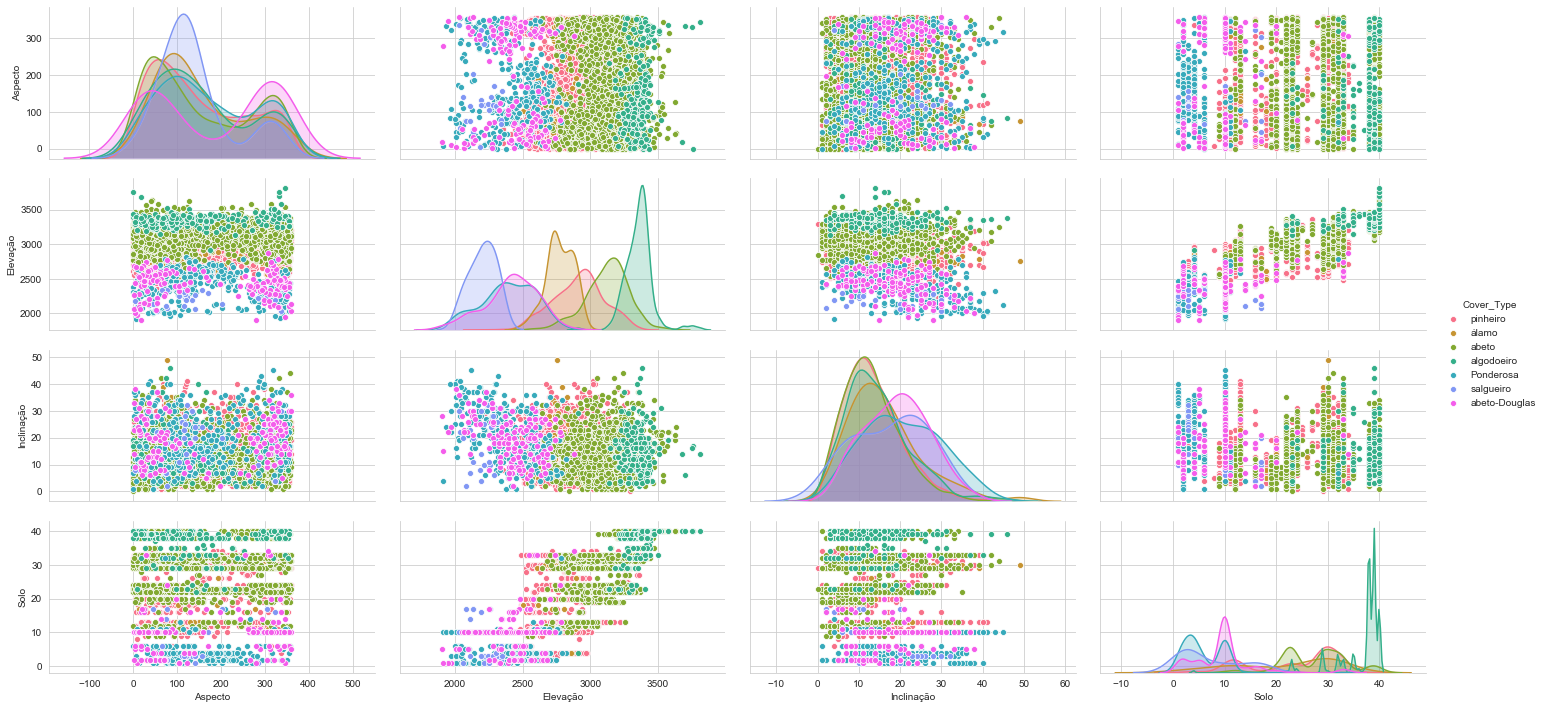

In [6]:
#@title Cria gráfico de corelação e distribuição das *Features* / Tipos de cobertura.
sns.set_style('whitegrid')
sns.set_palette('rainbow')
sns.pairplot(df_amostra, hue='Cover_Type', aspect=2)

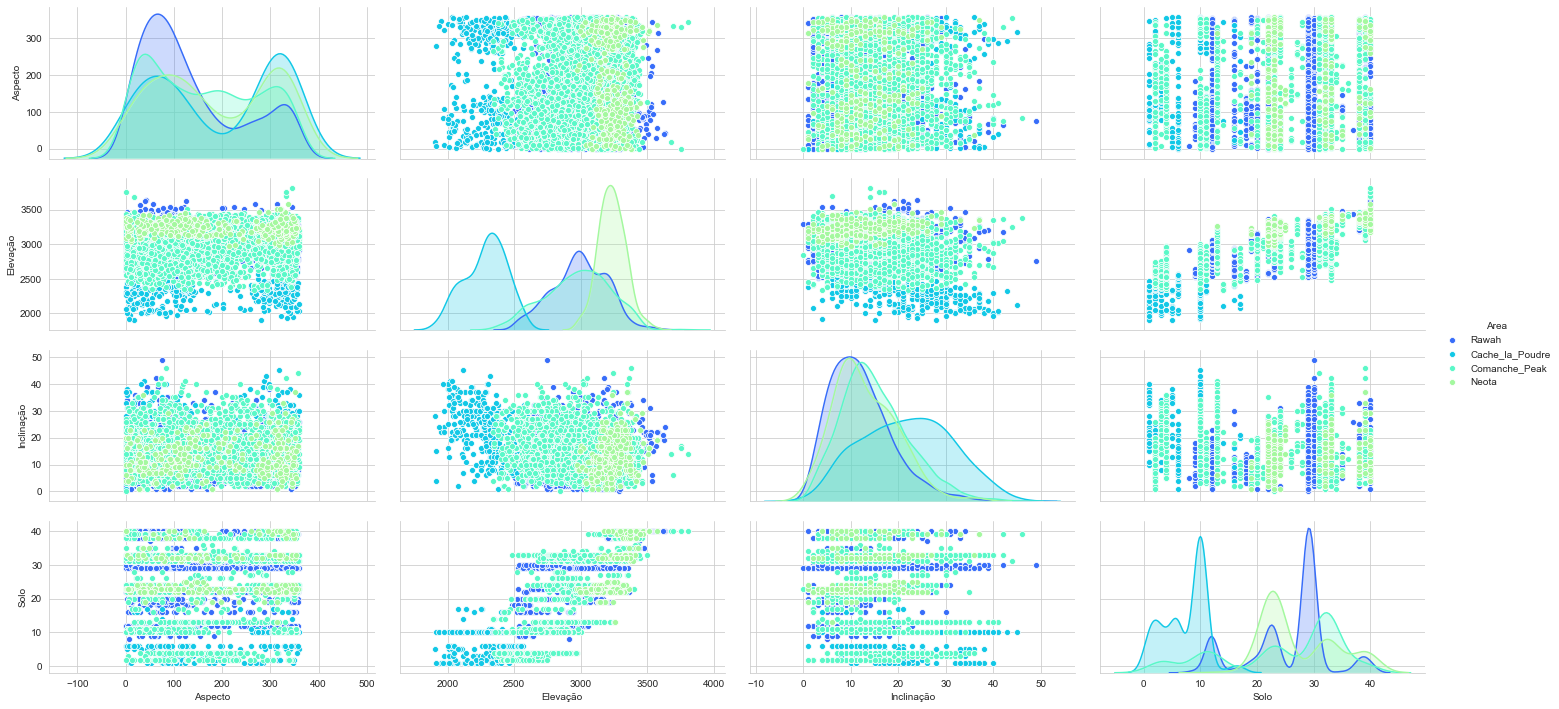

In [7]:
#@title Cria gráfico de corelação e distribuição das *Features* / Tipo de área.
sns.pairplot(df_amostra, hue='Area', aspect=2)

Text(0.5, 1, 'Distribuição Tipos de cobertura X Inclinação/Elevação')

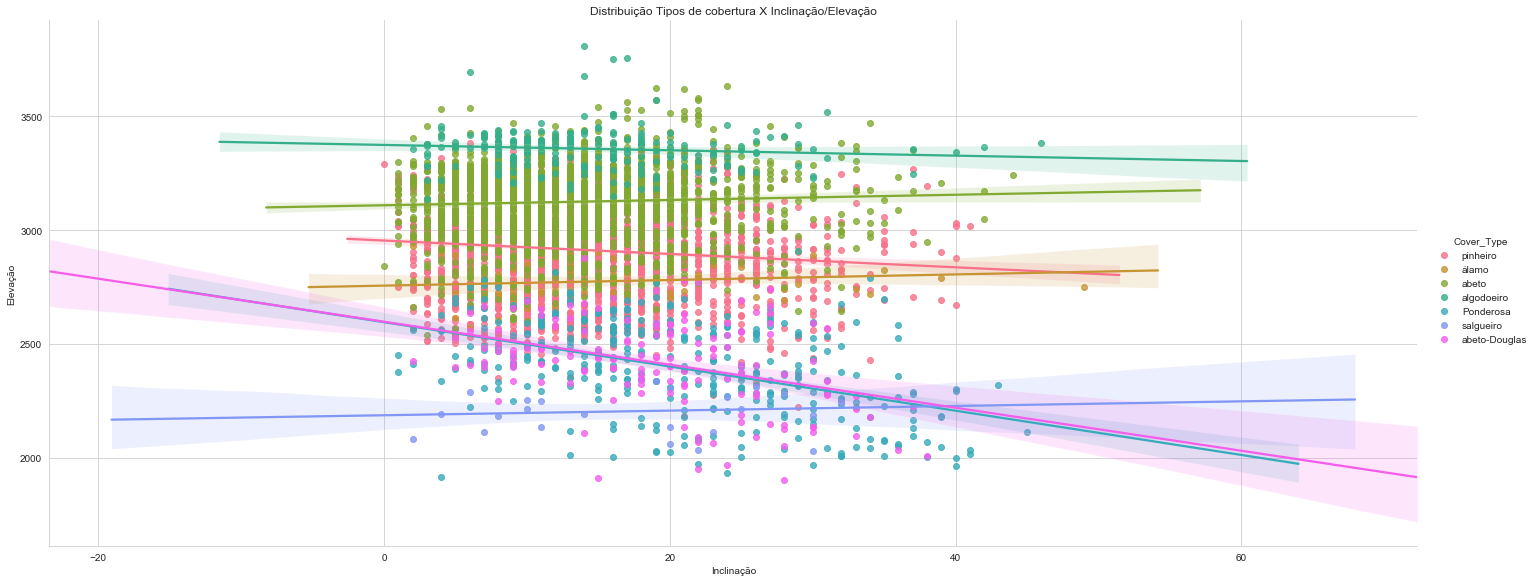

In [8]:
#@title Cria gráfico de distribuição das *Features* "Inclinação X Elevação" / Tipo de cobertura.
sns.lmplot('Inclinação','Elevação',  df_amostra, hue='Cover_Type', height=8, aspect=2.5)
plt.title('Distribuição Tipos de cobertura X Inclinação/Elevação')

Text(0.5, 1, 'Distribuição Tipos de cobertura X Aspecto/Elevação')

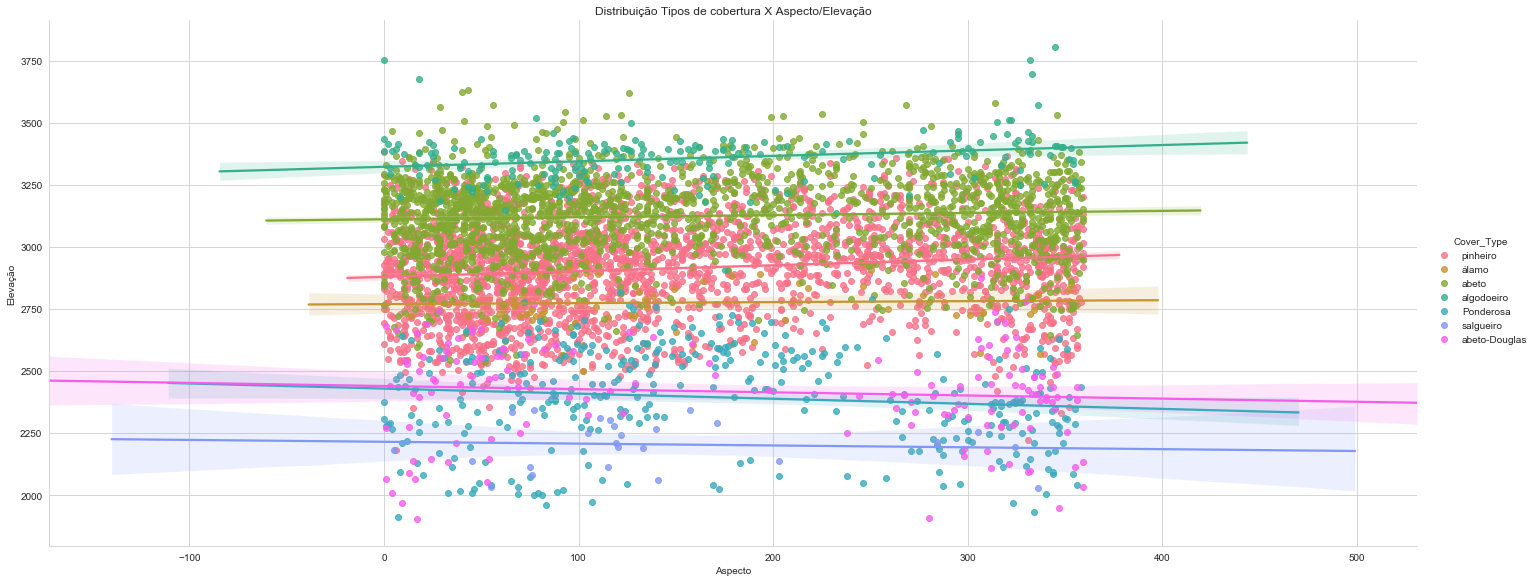

In [9]:
#@title Cria gráfico de disperção das *Features* "Aspecto X Elevação" / Tipo de cobertura.
sns.lmplot('Aspecto','Elevação',  df_amostra, hue='Cover_Type', height=8, aspect=2.5)
plt.title('Distribuição Tipos de cobertura X Aspecto/Elevação')

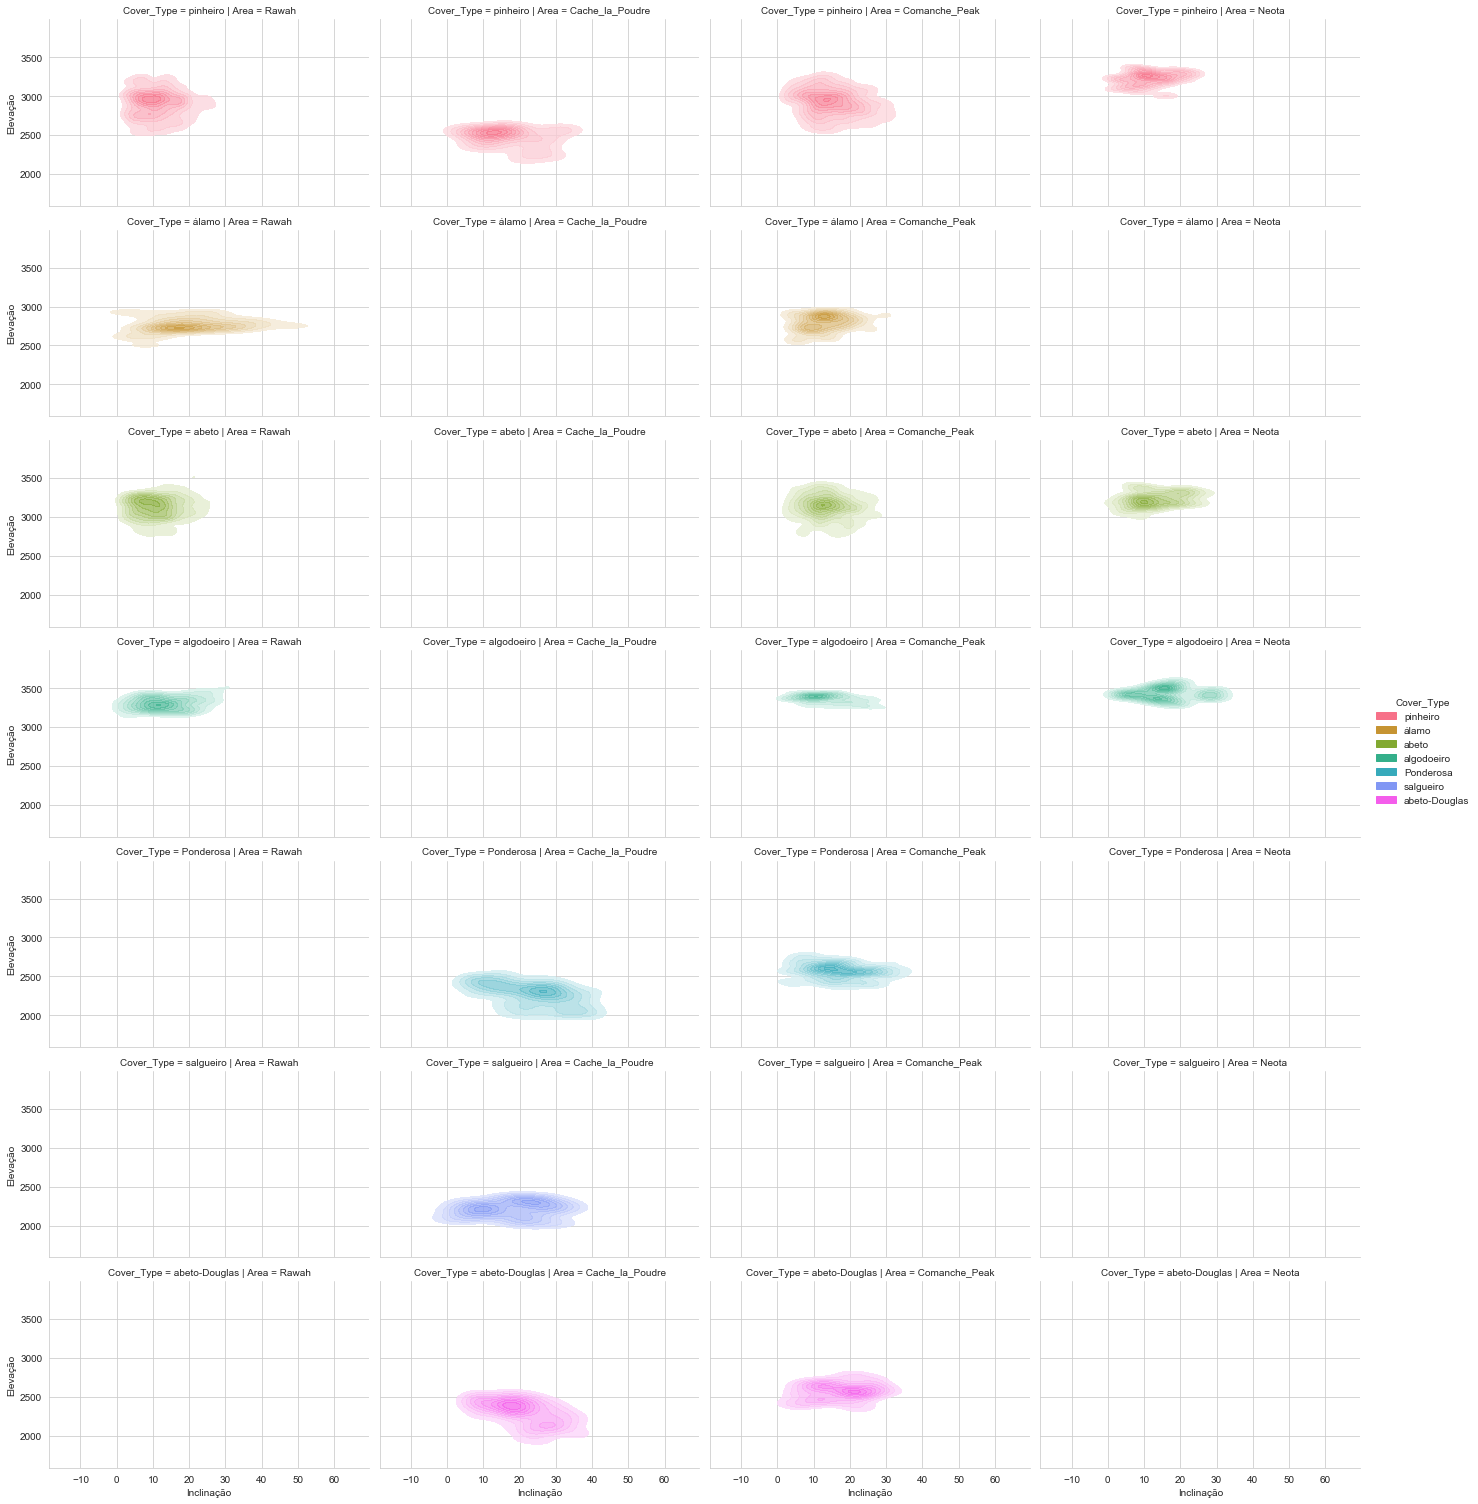

In [10]:
#@title Cria gráfico de distribuição das *Features* "Inclinação X Elevação" / Tipo de cobertura e Tipo de Área.
grid = sns.FacetGrid(df_amostra, col='Area', hue='Cover_Type', row='Cover_Type', aspect=1.6)
grid.map(sns.kdeplot,'Inclinação', 'Elevação', shade=True, shade_lowest=False, alpha=0.75)
grid.add_legend()

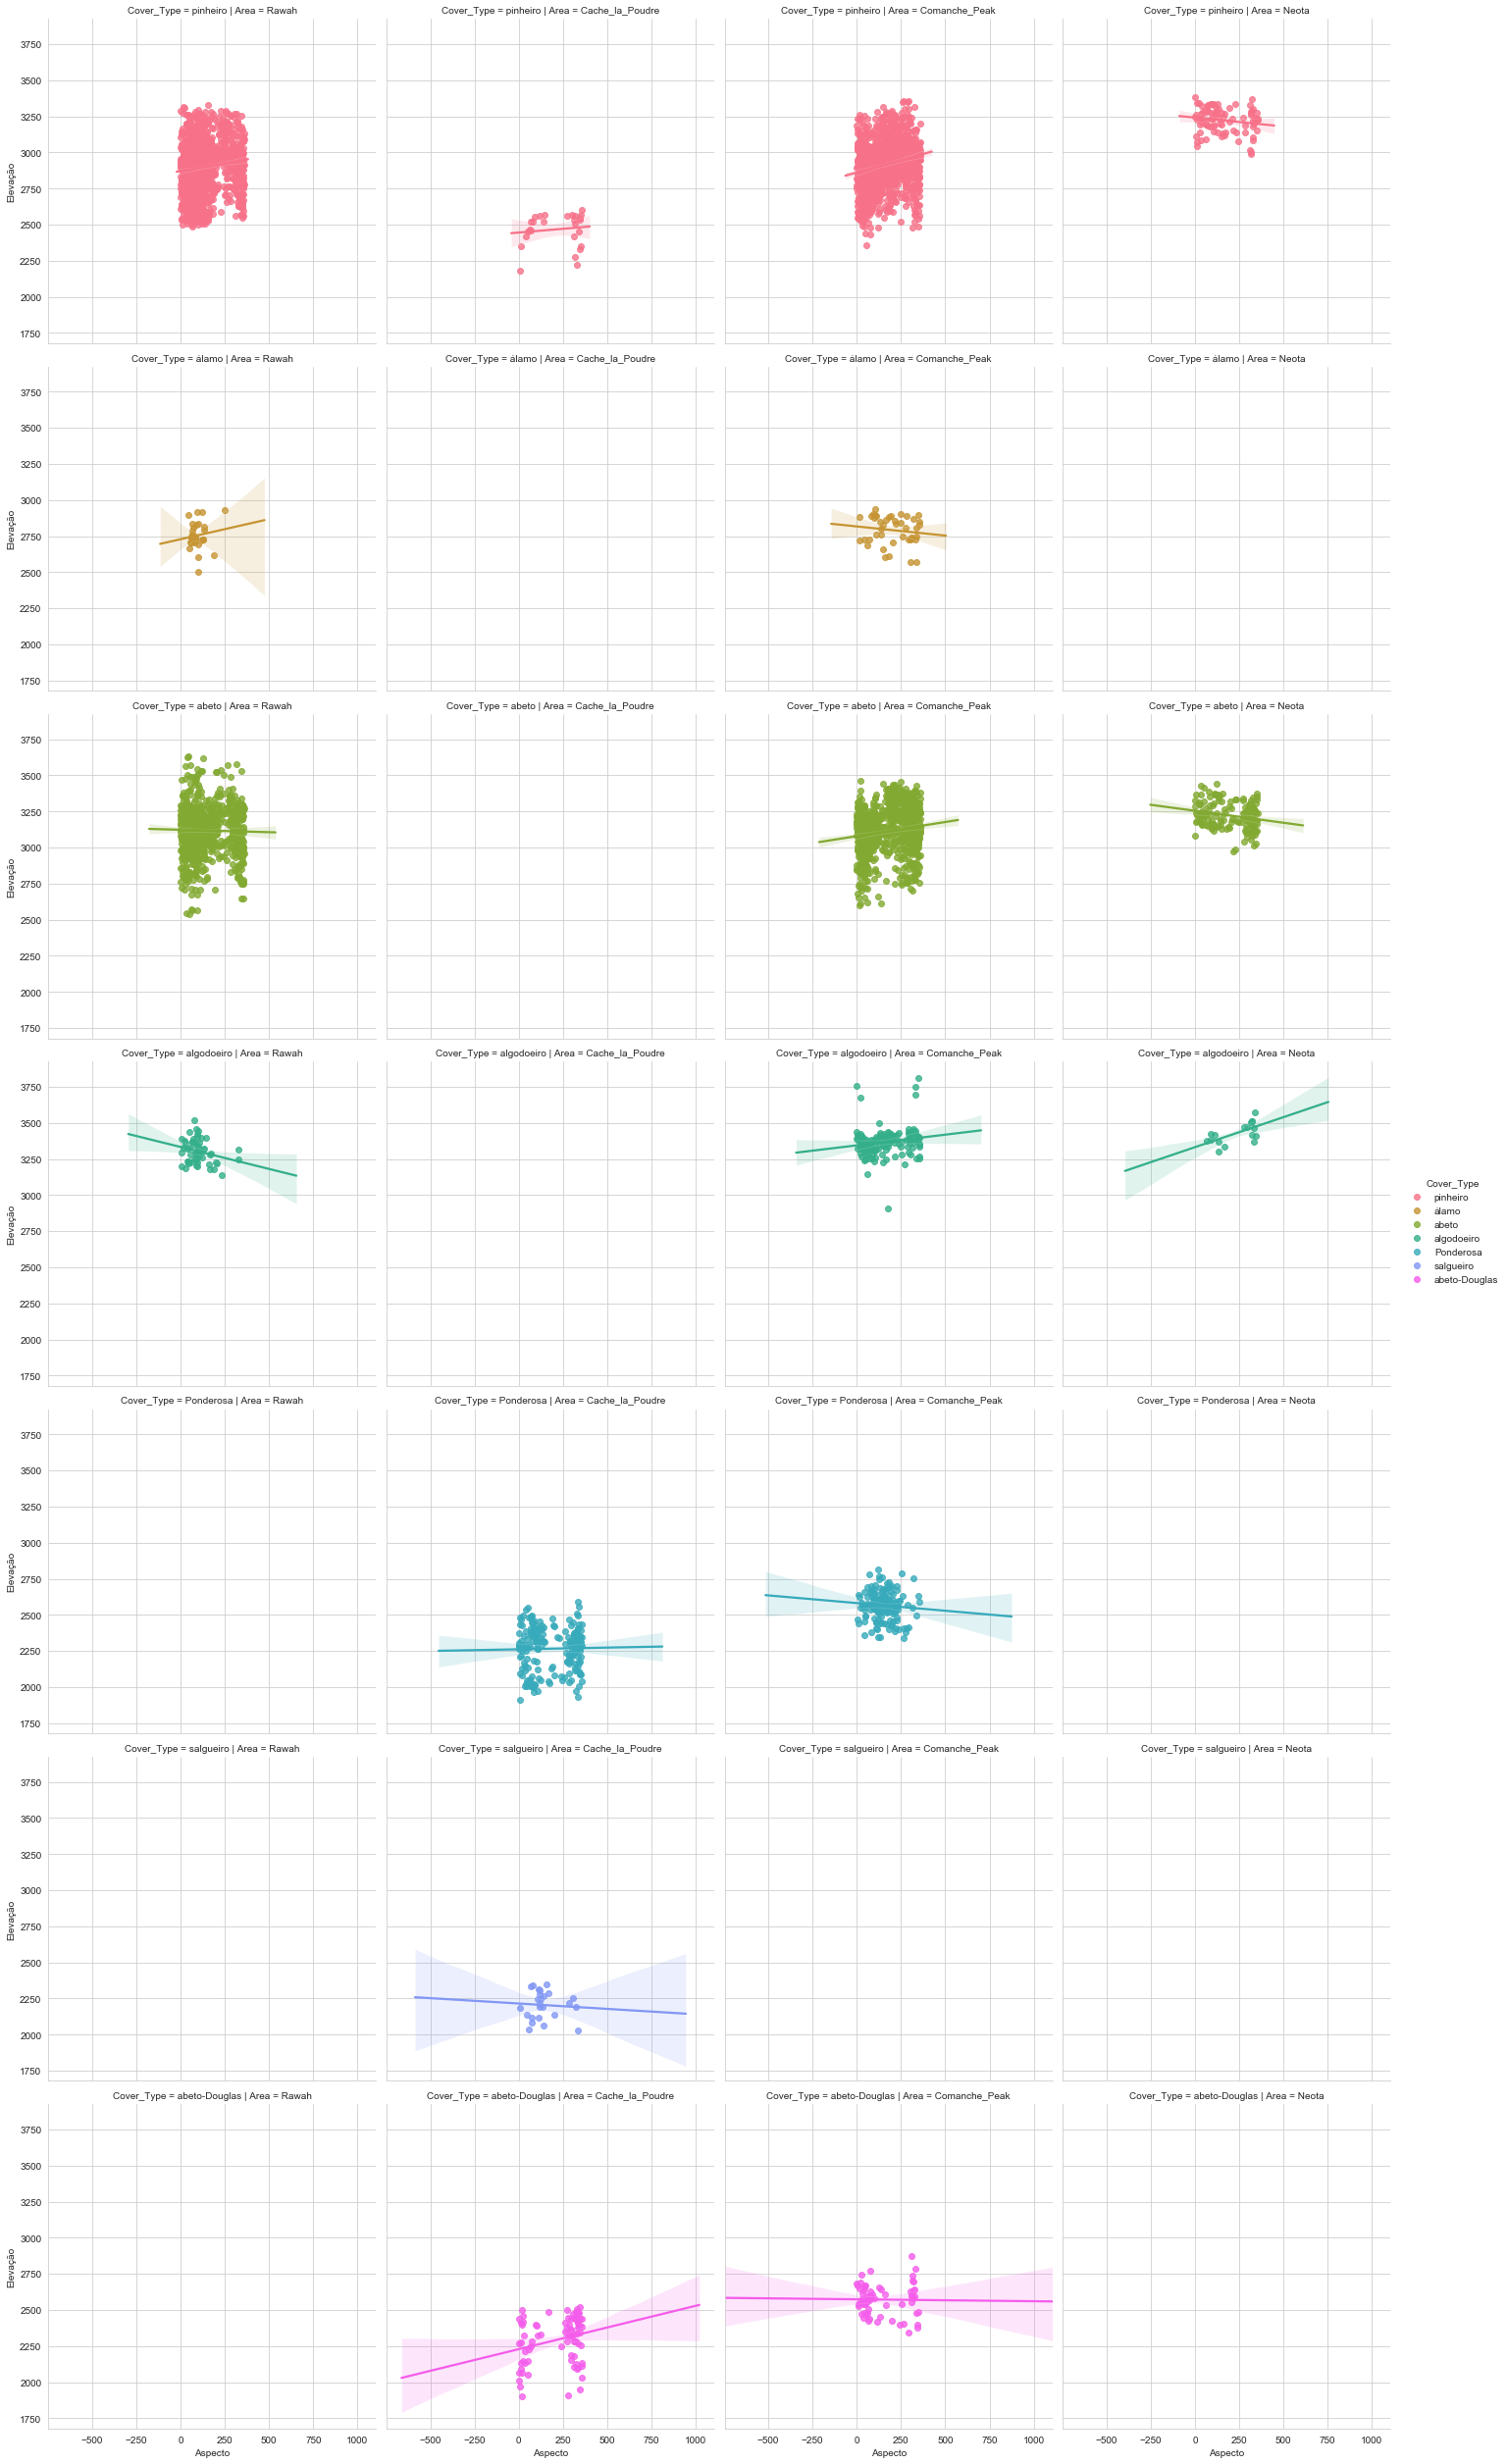

In [11]:
#@title Cria gráfico de disperção "Aspecto X Elevação" / Tipo de cobertura e Tipo de Área.
sns.lmplot('Aspecto', 'Elevação', df_amostra, hue='Cover_Type', col='Area', row='Cover_Type').add_legend()

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

Árvore de decisão (DecisionTree)


In [12]:
#@title Faz a validação cruzada do método.
classificador = DecisionTreeClassifier()
X, y = getData()
result = cross_val_score(classificador, X, y, cv=10)
print('Média de acertos: ', result.mean(), '\nDesvio padrão: ', result.std())

Média de acertos:  0.5911437377111342 
Desvio padrão:  0.05332406290132361


#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [13]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
#@title <ul><li>Istancia classe do método *DecisionTree*.</li><li>Divide a base para treino e teste.</li><li>Treina o modelo para baseline.</li></ul>

X = np.asanyarray(amostra.drop('Cover_Type', inplace=False, axis=1))
y = np.asanyarray(amostra['Cover_Type'])
dtree = DecisionTreeClassifier(random_state=101)
qtd_test=0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [14]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do baseline</li><li>Exibe as métricas da classificação e a matriz de confusão do baseline.
predict = dtree.predict(X_test)
baseline_classification = classification_report(y_test, predict)
baseline_confusion = confusion_matrix(y_test, predict)
precisao_baseline = accuracy_score(y_test, predict)
print('Precisão do modelo: ', precisao_baseline,'\n\n')
print('------------Baseline Classification------------\n', baseline_classification)
print('------------Baseline Confusion------------\n', baseline_confusion)

Precisão do modelo:  0.8812957157784744 


------------Baseline Classification------------
               precision    recall  f1-score   support

           1       0.88      0.88      0.88     20945
           2       0.90      0.90      0.90     28001
           3       0.88      0.87      0.88      3565
           4       0.79      0.79      0.79       304
           5       0.67      0.68      0.68       895
           6       0.76      0.78      0.77      1648
           7       0.89      0.88      0.88      2062

    accuracy                           0.88     57420
   macro avg       0.82      0.83      0.83     57420
weighted avg       0.88      0.88      0.88     57420

------------Baseline Confusion------------
 [[18417  2276     2     0    45     7   198]
 [ 2355 25117   130     0   233   132    34]
 [    0   145  3115    44    19   242     0]
 [    0     0    43   241     0    20     0]
 [   40   222    14     0   613     6     0]
 [    9   108   223    19     5  1284     

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [31]:
#@title <ul><li>Istancia a classe de normalização *MinMax* e normaliza os previsores. </li><li>Istancia a classe PCA e divide as bases de treino e teste.</li><li>Treina o modelo *Decision Tree* reduzido e normalizado.</li></ul>
mm_scaler = MinMaxScaler()
X = np.asanyarray(amostra.drop('Cover_Type', inplace=False, axis=1))
y = np.asanyarray(amostra['Cover_Type'])
X = mm_scaler.fit_transform(X[:,:10])
df_normalizado = pd.DataFrame(X, columns=df_covtypes.columns[:10])
df_normalizado = df_normalizado.join(df_covtypes.drop(['Elevação','Aspecto','Inclinação','H_Distance_Hidrologia','V_Distance_Hidrologia','H_Distance_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','H_Distance_Fire_Points','Cover_Type'], inplace=False, axis=1))
X = df_normalizado
error_rate = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
pca = PCA(n_components=define_nComponentesPCA(X_train, X_test, y_train, y_test, qtd_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
X_train, X_test = reduz_dimensionPCA(X_train, X_test)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

Text(0, 0.5, 'Taxa de Erro')

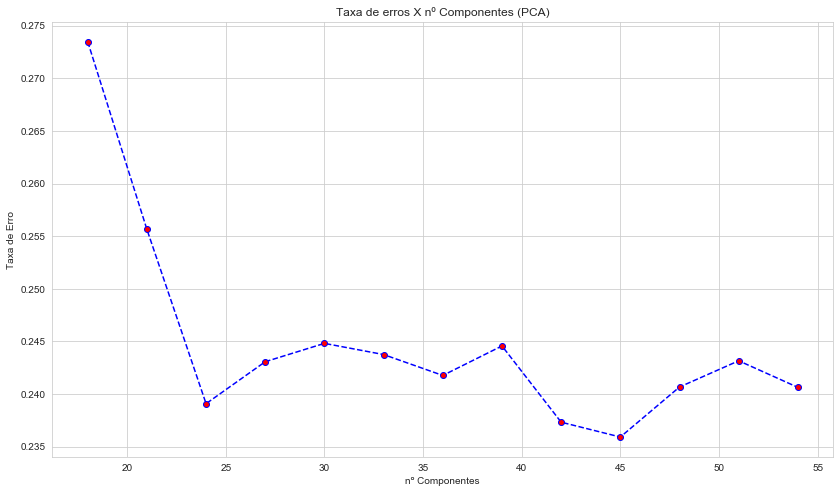

In [32]:
#@title Cria o gráfico de taxa de erros a partir do número de componentes PCA
plt.figure(figsize=(14,8))
plt.title('Taxa de erros X nº Componentes (PCA)')
plt.plot(range(18, 55, 3), error_rate, color='b', linestyle='dashed', marker='o', mfc='r')
plt.xlabel('nº Componentes')
plt.ylabel('Taxa de Erro')

In [33]:
#@title Média da relação entre os componentes e a distância entre os valores.
componentes = pca.explained_variance_ratio_
print('Quantidade de componentes: ', len(componentes), '\nMédia de variância: ', componentes.mean(), '\nDesvio padrão das variâncias',componentes.std())

Quantidade de componentes:  45 
Média de variância:  0.022216916082653304 
Desvio padrão das variâncias 0.04641800910033631


In [34]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do modelo</li><li>Exibe as métricas da classificação e a matriz de confusão.
predict = dtree.predict(X_test)
classification = classification_report(y_test, predict)
confusion = confusion_matrix(y_test, predict)
precisao = accuracy_score(y_test, predict)
print('Precisão do baseline: ',precisao_baseline,'\nPrecisão do modelo: ', precisao,'\n\n')
print('\n------------------Classification-----------------\n', classification)
print('\n-------------------Confusion-------------------\n', confusion)

Precisão do baseline:  0.8812957157784744 
Precisão do modelo:  0.7587774294670846 



------------------Classification-----------------
               precision    recall  f1-score   support

           1       0.76      0.76      0.76     21072
           2       0.80      0.80      0.80     27957
           3       0.73      0.72      0.73      3538
           4       0.52      0.51      0.51       254
           5       0.41      0.41      0.41       941
           6       0.51      0.49      0.50      1681
           7       0.70      0.70      0.70      1977

    accuracy                           0.76     57420
   macro avg       0.63      0.63      0.63     57420
weighted avg       0.76      0.76      0.76     57420


-------------------Confusion-------------------
 [[16015  4444    10     1    81    35   486]
 [ 4500 22286   385     5   411   279    91]
 [   17   419  2553    70    31   447     1]
 [    0     9    79   129     3    34     0]
 [   98   425    25     1   383    

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [35]:
#@title Istancia o método *DecisionTree* definindo *Entropy* como critério de cálculo.
dtree = DecisionTreeClassifier(criterion='entropy', random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [36]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do modelo *tunned*</li><li>Exibe as métricas da classificação e a matriz de confusão *tunned*.
predict = dtree.predict(X_test)
tunned_classification = classification_report(y_test, predict)
tunned_confusion = confusion_matrix(y_test, predict)
precisao_tunned = accuracy_score(y_test, predict)
print('Precisão do baseline: ',precisao_baseline,'\nPrecisão do modelo: ', precisao,'\nPrecisão tunned: ',precisao_tunned,'\n\n')
print('-------------Tunned Classification--------------\n', tunned_classification)
print('\n------------Tunned Confusion-------------------\n', tunned_confusion)

Precisão do baseline:  0.8812957157784744 
Precisão do modelo:  0.7587774294670846 
Precisão tunned:  0.8527516544757924 


-------------Tunned Classification--------------
               precision    recall  f1-score   support

           1       0.85      0.85      0.85     21075
           2       0.87      0.87      0.87     27913
           3       0.82      0.83      0.82      3477
           4       0.77      0.77      0.77       268
           5       0.61      0.66      0.63       880
           6       0.71      0.68      0.69      1772
           7       0.87      0.83      0.85      2035

    accuracy                           0.85     57420
   macro avg       0.79      0.78      0.79     57420
weighted avg       0.85      0.85      0.85     57420


------------Tunned Confusion-------------------
 [[18019  2788     1     0    38     6   223]
 [ 2761 24390   257     2   302   171    30]
 [    5   252  2872    37    20   291     0]
 [    0     1    43   206     0    18     0]

#### 3.5) Qual método escolhido?

KNN (K-Nearest Neighbors)

In [22]:
#@title Faz a validação cruzada do método.
classificador = KNeighborsClassifier(n_neighbors=1)
X, y = getData()
result = cross_val_score(classificador, X, y, cv=10)
print('Média de acertos: ', result.mean(), '\nDesvio padrão: ', result.std())

Média de acertos:  0.6146550313370877 
Desvio padrão:  0.033303527956710155


#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [24]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
#@title <ul><li>Istancia a KNN (*K Nearest Neighbors*)</li><li>Divide a base para treino e teste</li><li>Treina o modelo baseline</li></ul>

X = np.asanyarray(amostra.drop('Cover_Type', inplace=False, axis=1))
y = np.asanyarray(amostra['Cover_Type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [25]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do baseline</li><li>Exibe as métricas da classificação e a matriz de confusão do baseline.
predict = knn.predict(X_test)
knn_precisao_baseline = accuracy_score(y_test, predict)
knn_baseline_classification = classification_report(y_test, predict)
knn_baseline_confusion = confusion_matrix(y_test, predict)
print('Precisão do baseline: ', knn_precisao_baseline,'\n')
print('\n------------Baseline Classification------------\n', knn_baseline_classification)
print('\n------------Baseline Confusion----------------\n', knn_baseline_confusion)

Precisão do baseline:  0.9415708812260536 


------------Baseline Classification------------
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     21068
           2       0.95      0.95      0.95     27864
           3       0.92      0.93      0.93      3438
           4       0.81      0.78      0.80       281
           5       0.84      0.83      0.83       968
           6       0.88      0.88      0.88      1679
           7       0.95      0.94      0.94      2122

    accuracy                           0.94     57420
   macro avg       0.90      0.89      0.90     57420
weighted avg       0.94      0.94      0.94     57420


------------Baseline Confusion----------------
 [[19850  1095     0     0    26     3    94]
 [ 1047 26521    97     0   120    62    17]
 [    2    82  3203    35     6   110     0]
 [    0     1    39   220     0    21     0]
 [   23   116    22     0   803     4     0]
 [    1    72   106    15     4  14

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [54]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
#@title <ul><li>Divide a base para treino e teste</li><li>Istancia a KNN (*K Nearest Neighbors*)</li><li>Treina o modelo reduzido e normalizado por *MinMax*.</li></ul>
X = np.asanyarray(amostra.drop('Cover_Type', inplace=False, axis=1))
y = np.asanyarray(amostra['Cover_Type'])
X = mm_scaler.fit_transform(X)
#df_normalizado = pd.DataFrame(X, columns=df_covtypes.columns[:10])
#df_normalizado = df_normalizado.join(df_covtypes.drop(['Elevação','Aspecto','Inclinação','H_Distance_Hidrologia','V_Distance_Hidrologia','H_Distance_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','H_Distance_Fire_Points','Cover_Type'], inplace=False, axis=1))
#X = df_normalizado

error_rate = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)

pca = PCA(n_components=define_nComponentesPCA(X_train, X_test, y_train, y_test,qtd_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
X_train, X_test = reduz_dimensionPCA(X_train, X_test)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Text(0, 0.5, 'Taxa de Erro')

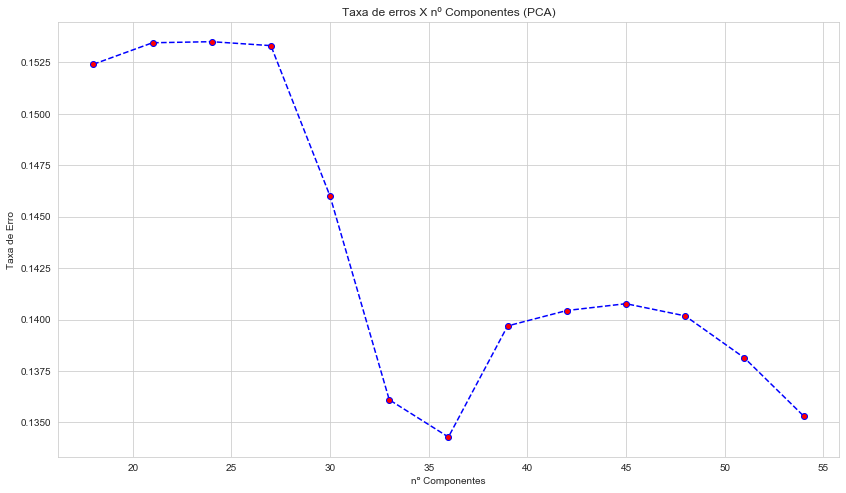

In [55]:
#@title Cria o gráfico de taxa de erros a partir do número de componentes PCA
plt.figure(figsize=(14,8))
plt.title('Taxa de erros X nº Componentes (PCA)')
plt.plot(range(18, 55, 3), error_rate, color='b', linestyle='dashed', marker='o', mfc='r')
plt.xlabel('nº Componentes')
plt.ylabel('Taxa de Erro')

In [56]:
#@title Média da relação entre os componentes e a distância entre os valores.
componentes = pca.explained_variance_ratio_
print('Quantidade de componentes: ', len(componentes), '\nMédia de variância: ', componentes.mean(), '\nDesvio padrão das variâncias',componentes.std())

Quantidade de componentes:  36 
Média de variância:  0.027462196767345612 
Desvio padrão das variâncias 0.050117153411761865


In [57]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do modelo.</li><li>Exibe as métricas da classificação e a matriz de confusão do modelo.
predict = knn.predict(X_test)
knn_precisao = accuracy_score(y_test, predict)
knn_classification = classification_report(y_test, predict)
knn_confusion = confusion_matrix(y_test, predict)
print('Precisão do baseline: ', knn_precisao_baseline,'\nPrecisão do modelo: ', knn_precisao,'\n')
print('\n--------------Classification--------------\n', knn_classification)
print('\n----------------Confusion----------------\n', knn_confusion)

Precisão do baseline:  0.9415708812260536 
Precisão do modelo:  0.8985719261581331 


--------------Classification--------------
               precision    recall  f1-score   support

           1       0.90      0.90      0.90     20950
           2       0.91      0.91      0.91     28007
           3       0.88      0.88      0.88      3598
           4       0.76      0.70      0.73       273
           5       0.73      0.70      0.72       950
           6       0.76      0.78      0.77      1655
           7       0.90      0.91      0.91      1987

    accuracy                           0.90     57420
   macro avg       0.84      0.83      0.83     57420
weighted avg       0.90      0.90      0.90     57420


----------------Confusion----------------
 [[18841  1908     0     0    25     8   168]
 [ 1894 25610   140     1   201   126    35]
 [    4   130  3172    38     9   245     0]
 [    0     0    53   192     0    28     0]
 [   43   223    13     0   667     4     0]
 [  

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [58]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
#@title <ul><li>Istancia a classe "KNN".</li><li>Define o número de "k".</li><li>Treina o modelo *tunned*.
error_rate = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=qtd_test)
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  error_rate.append(np.mean(pred != y_test))
  if np.mean(pred != y_test) == min(error_rate):
    k = i
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Text(0, 0.5, 'Taxa de Erro')

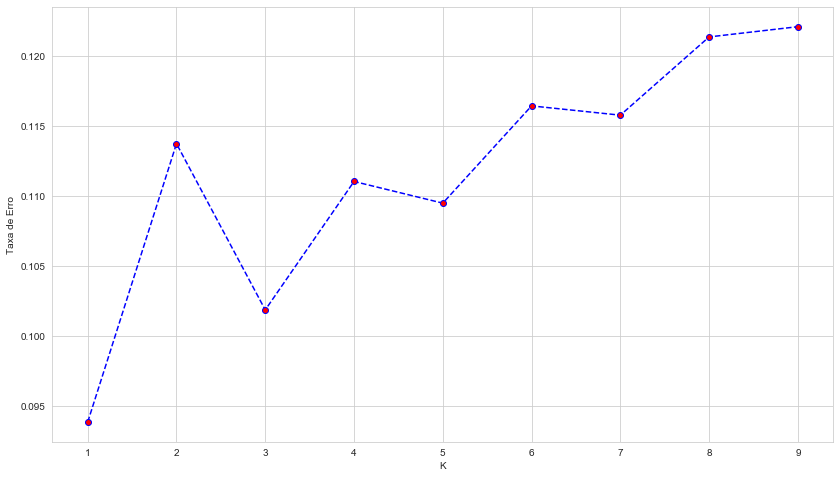

In [60]:
#@title Cria o gráfico de taxa de erros a partir do número de "k".
plt.figure(figsize=(14,8))
plt.plot(range(1, 10), error_rate, color='b', linestyle='dashed', marker='o', mfc='r')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')

In [61]:
#@title <ul><li>Tira predições do modelo.</li><li>Avalia a precisão do modelo *tunned*</li><li>Exibe as métricas da classificação e a matriz de confusão *tunned*.
predict = knn.predict(X_test)
knn_precisao_tunned = accuracy_score(y_test, predict)
knn_tunned_classification = classification_report(y_test, predict)
knn_tunned_confusion = confusion_matrix(y_test, predict)
print('Precisão do baseline: ',knn_precisao_baseline,'\nPrecisão do modelo: ', knn_precisao,'\nPrecisão tunned: ',knn_precisao_tunned,'\n\n')
print('\n-----------Tunned Classification------------\n', knn_tunned_classification)
print('\n-----------Tunned Classification--------------\n', knn_tunned_confusion)

Precisão do baseline:  0.9415708812260536 
Precisão do modelo:  0.8985719261581331 
Precisão tunned:  0.9061302681992337 



-----------Tunned Classification------------
               precision    recall  f1-score   support

           1       0.91      0.91      0.91     20975
           2       0.92      0.92      0.92     28041
           3       0.89      0.88      0.88      3479
           4       0.78      0.75      0.76       278
           5       0.74      0.72      0.73       918
           6       0.77      0.79      0.78      1672
           7       0.92      0.92      0.92      2057

    accuracy                           0.91     57420
   macro avg       0.85      0.84      0.84     57420
weighted avg       0.91      0.91      0.91     57420


-----------Tunned Classification--------------
 [[18998  1799     0     0    30    12   136]
 [ 1726 25882   107     2   184   109    31]
 [    2   112  3066    38     7   254     0]
 [    0     0    48   209     0    21     0]
 [ 

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

Tratar os *outliers* identificados no gráfico abaixo removendo ou sbstituindo os valores pela média dos vizinhos.

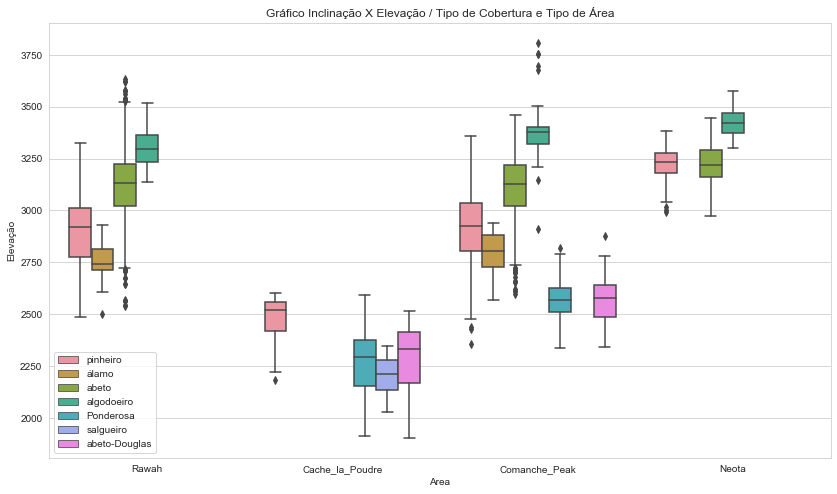

In [49]:
#@title Cria o gráfico Área X Elevação / Tipo de Cobertura
plt.figure(figsize=(14,8))
sns.boxplot(x='Area', y='Elevação', data=df_amostra, hue='Cover_Type')
plt.title('Gráfico Inclinação X Elevação / Tipo de Cobertura e Tipo de Área')
plt.legend()